# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vanessa Audrie Tanaka
- **Email:** vanessaaudrie@students.usu.ac.id
- **ID Dicoding:** vanessaaudrietanaka

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana perbandingan jumlah sewa sepeda di setiap musim di tahun 2011 dan 2012?
- Pertanyaan 2: Bagaimana pengaruh humidity terhadap jumlah sewa sepeda pengguna casual dan registered?

## Import Semua Packages/Library yang Digunakan

Pertama, import semua library yang akan digunakan.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Akan ada 3 tahap yang dilakukan di data wrangling, yaitu:
- Gathering Data: Pengumpulan/loading data
- Assessing Data: Menilai/mengidentifikasi masalah yang ada di data
- Cleaning Data: Membersihkan data

### Gathering Data

Pertama, dataset day akan di load menjadi DataFrame day_df dan ditampilkan 5 kolom teratasnya

In [40]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dataset hour akan diload juga

In [41]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day memiliki kolom instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt
- Dataset hour memiliki tambahan kolom hr dan datanya lebih banyak karena dihitung berdasarkan jam

### Assessing Data

**Dataset day_df**

Untuk mengecek tipe data dari setiap kolom yang ada di dataset, digunakan metode info()

In [42]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Semua kolom memiliki 731 data yang artinya tidak ada missing value di semua kolom
- Kolom instant, season, yr, mnth, holiday, weekday, workingday, weathersit, casual, registered, dan cnt memiliki tipe data int
- Kolom temp, atemp, hum, windspeed memiliki tipe data float
- Kolom dteday memiliki tipe data object, namun kolom ini lebih cocok jika menggunakan tipe data datetime

Untuk memastikan sekali lagi, dapat digunakan isna untuk mengecek apakah ada value yang null

In [43]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ada data yang null di semua kolom

Kemudian, untuk mengecek data yang duplikat dapat menggunakan duplicated().sum()

In [44]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada data yang duplikat di dataset

describe digunakan untuk mendapatkan ringkasan parameter statistik

In [45]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Seluruh kolom memiliki 731 data
- Tidak ada data yang memiliki keanehan, max pada tiap kolom tidak menunjukkan data yang melewati range

**Dataset hour_df**

In [46]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Semua kolom memiliki 17379 data yang artinya tidak ada missing value di semua kolom
- Kolom instant, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, casual, registered, dan cnt memiliki tipe data int
- Kolom temp, atemp, hum, windspeed memiliki tipe data float
- Kolom dteday memiliki tipe data object, namun kolom ini lebih cocok jika menggunakan tipe data datetime

In [47]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada data yang null di semua kolom

In [48]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada data yang duplikat di dataset

In [49]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Seluruh kolom memiliki 17379 data
- Tidak ada data yang memiliki keanehan, max pada tiap kolom tidak menunjukkan data yang melewati range

### Cleaning Data

Kemudian, kolom dteday akan diubah menjadi tipe data datetime untuk menunjukkan tanggal karena sebelumnya kolom dteday masih memiliki tipe data object

In [50]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kolom dteday sudah diubah tipe datanya

In [51]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kolom dteday sudah diubah tipe datanya

**Insight:**
- Kolom dteday sudah diubah tipe datanya dari object menjadi datetime untuk menunjukkan tanggal
- Kolom lainnya masih sama tipe datanya dengan sebelumnya

## Exploratory Data Analysis (EDA)

### Explore day_df

In [52]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Seluruh kolom memiliki 731 data
- Tidak ada data yang memiliki keanehan, max pada tiap kolom tidak menunjukkan data yang melewati range
- Di kolom season, dari range 1-4, mean berasa di 2.49 yang artinya persebaran jumlah sewa lumayan tinggi di musim 2 (Summer) dan 3 (Fall)
- Kolom yr dan month menunjukkan bahwa jumlah sewa lebih dominan di pertengahan tahun (mean 6.51, sekitar Juli-Agustus)
- Mean kolom holiday hanya bernilai 0.028 yang artinya sedikit saja hari libur dibandingkan dengan workingday 0.684
- Kolom weekdays menunjukkan hari, 0 = Minggu dan 6 = Sabtu, mean berada di 2.99 yanga artinya lebih banyak sewa di Selasa/Rabu
- Kolom weathersit menunjukkan nilai max 3, jika berdasarkan dataset maka no 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) tidak memiliki jumlah sewa sama sekali dan mean berasa di 1.39 artinya sewa sepeda paling banyak di cuaca 1 dan 2
- Mean jumlah sewa casual = 848, registered = 3656, artinya mayoritas penyewa adalah registered
- Kolom cnt merupakan jumlah dari kolom casual dan registered, mean dan median kolom cnt sangat dekat angkanya (mean = 4504 dan median 4548), kemungkinan besar distribusinya simetris
- Max sewa dari pengguna casual adalah 3410 dalam 1 hari dan min 2 dalam 1 hari
- Max sewa dari pengguna registered adalah 6946 dalam 1 hari dan min 20 dalam 1 hari
- Total sewa paling banyak dalam 1 hari adalah 8714 dan paling sedikit adalah 22 dalam 1 hari

Untuk memudahkan visualisasi, dilakukan pengubahan value data kategorikal dari kolom yr, weekday, dan season

In [53]:
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})
day_df['weekday'] = day_df['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
day_df['season'] = day_df['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,2012,12,0,Thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,0,Friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,0,Saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,0,Sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Untuk melihat demografi sewa berdasarkan season yang dibagi menjadi casual dan registered akan menggunakan method groupby() yang diikuti dengan method agg()

In [54]:
day_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                         registered                          \
           sum   max  min         mean        sum   max  min         mean   
season                                                                      
fall    226091  3160  118  1202.611702     835038  6917  889  4441.691489   
spring   60622  3155    9   334.928177     410726  5315  416  2269.204420   
summer  203522  3410  120  1106.097826     715067  6456  674  3886.233696   
winter  129782  3031    2   729.112360     711831  6946   20  3999.050562   

            cnt                           
            sum   max   min         mean  
season                                    
fall    1061129  8714  1115  5644.303191  
spring   471348  7836   431  2604.132597  
summer   918589  8362   795  4992.331522  
winter   841613  8555    22  4728.162921

**Insight:**
- Pengguna registered lebih banyak dibandingkan pengguna casual
- Jumlah sewa dominasi di season summer dan fall untuk pengguna casual
- Untuk pengguna registered lebih stabil jumlahnya di season summer, fall, dan Winter namun kurang banyak di season spring

Selanjutnya, demografi sewa berdasarkan season yang dibagi menjadi casual dan registered akan dibagi lagi berdasarkan tahun

In [55]:
day_df.groupby(by=["yr", "season"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                         registered              \
                sum   max  min         mean        sum   max   min   
yr   season                                                          
2011 fall     95450  3065  118  1015.425532     324200  4614   889   
     spring   21425  1424    9   238.055556     128575  2841   416   
     summer   77564  2355  121   843.086957     269752  4414   674   
     winter   52813  2397   50   593.404494     273324  4372   570   
2012 fall    130641  3160  371  1389.797872     510838  6917  3195   
     spring   39197  3155    9   430.736264     282151  5315   432   
     summer  125958  3410  120  1369.108696     445315  6456   907   
     winter   76969  3031    2   864.820225     438507  6946    20   

                             cnt                           
                    mean     sum   max   min         mean  
yr   season                                                
2011 fall    3448.936170  419650  6043  1115  4464.361702  
     spring  1428.611111  150000  3239   431  1666.666667  
     summer  2932.086957  347316  5805   795  3775.173913  
     winter  3071.056180  326137  5511   627  3664.460674  
2012 fall    5434.446809  641479  8714  4073  6824.244681  
     spring  3100.560440  321348  7836   441  3531.296703  
     summer  4840.380435  571273  8362  1027  6209.489130  
     winter  4927.044944  515476  8555    22  5791.865169

**Insight:**
- Pengguna registered lebih banyak dibandingkan pengguna casual baik di tahun 2011 maupun 2012 dan menunjukkan adanya peningkatan

Kemudian, demografi sewa berdasarkan bulan yang dibagi menjadi casual,  registered, dan total akan dihitung

In [56]:
day_df.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                         registered                           \
        sum   max  min         mean        sum   max   min         mean   
mnth                                                                      
1     12042  1070    9   194.225806     122891  4185   416  1982.112903   
2     14963  1435   47   262.508772     136389  4546   905  2392.789474   
3     44444  3155   46   716.838710     184476  5893   491  2975.419355   
4     60802  3252  120  1013.366667     208292  5950   674  3471.533333   
5     75285  3410  255  1214.274194     256401  6433  2213  4135.500000   
6     73906  2963  477  1231.766667     272436  6456  2993  4540.600000   
7     78157  3065  562  1260.596774     266791  6790  2298  4303.080645   
8     72039  2827  226  1161.919355     279155  6541   889  4502.500000   
9     70323  3160  118  1172.050000     275668  6946  1689  4594.466667   
10    59760  3031    2   963.870968     262592  6911    20  4235.354839   
11    36603  2290   69   610.050000     218228  5520   935  3637.133333   
12    21693  1153    9   349.887097     189343  6055   432  3053.919355   

         cnt                           
         sum   max   min         mean  
mnth                                   
1     134933  4521   431  2176.338710  
2     151352  5062  1005  2655.298246  
3     228920  8362   605  3692.258065  
4     269094  7460   795  4484.900000  
5     331686  8294  2633  5349.774194  
6     346342  8120  3767  5772.366667  
7     344948  8173  3285  5563.677419  
8     351194  7865  1115  5664.419355  
9     345991  8714  1842  5766.516667  
10    322352  8156    22  5199.225806  
11    254831  6852  1495  4247.183333  
12    211036  6606   441  3403.806452

**Insight:**
- Jumlah sewa dominasi di bulan 5 - 9 untuk pengguna casual, kemungkinan karena season yang bagus dan cocok untuk bersepeda (sekitar season spring dan fall)
- Jumlah sewa dominasi di bulan 4 - 11 untuk pengguna registered, namun jumlah sewa tidak melonjak terlalu banyak untuk bulan lainnya, kemungkinan pengguna registered merupakan pekerja/pelajar yang menggunakan sepeda untuk keseharian

Kemudian, jumlah sewa akan dilihat berdasarkan workingday, jika tidak ada libur atau weekday, maka akan berada di 1, sebaliknya jika ada libur atau weekend akan dikategorikan menjadi 0

In [57]:
day_df.groupby(["workingday"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                        registered                          \
               sum   max min         mean        sum   max  min         mean   
workingday                                                                     
0           316732  3410  54  1371.134199     683537  5966  451  2959.034632   
1           303285  2469   2   606.570000    1989125  6946   20  3978.250000   

                cnt                          
                sum   max  min         mean  
workingday                                   
0           1000269  8714  605  4330.168831  
1           2292410  8362   22  4584.820000

**Insight:**
- Pengguna registered lebih banyak di workingday (1) dibandingkan di bukan hari kerja (0)
- Jumlah sewa pengguna casual stabil (tidak beda jauh) antara workingday dan bukan workingday
- Ini memperkuat opini tentang pengguna registered merupakan pekerja/pelajar karena jumlah sewa pengguna registered yang beda jauh antara workingday dan bukan

Jumlah sewa akan dilbagi berdasarkan holiday, jika tidak ada libur maka 0, sebaliknya jika ada libur akan dikategorikan menjadi 1

In [58]:
day_df.groupby(["holiday"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                         registered                          \
            sum   max  min         mean        sum   max  min         mean   
holiday                                                                      
0        597658  3410    2   841.771831    2616586  6946   20  3685.332394   
1         22359  3065  117  1064.714286      56076  5172  573  2670.285714   

             cnt                           
             sum   max   min         mean  
holiday                                    
0        3214244  8714    22  4527.104225  
1          78435  7403  1000  3735.000000

**Insight:**
- Total sewa ketika holiday dan bukan holiday sangat beda jauh, yang didominasi oleh bukan holiday, baik untuk pengguna casual maupun registered

Kemudian, jumlah sewa akan dibagi berdasarkan weathersit, dimana pembagiannya:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [59]:
day_df.groupby(["weathersit"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                       registered                          \
               sum   max min        mean        sum   max  min         mean   
weathersit                                                                    
1           446346  3410  15  964.030238    1811606  6946  416  3912.755940   
2           169776  3155   9  687.352227     827082  6844  491  3348.510121   
3             3895  1264   2  185.476190      33974  4324   20  1617.809524   

                cnt                          
                sum   max  min         mean  
weathersit                                   
1           2257952  8714  431  4876.786177  
2            996858  8362  605  4035.862348  
3             37869  4639   22  1803.285714

**Insight:**
- Total sewa paling banyak di weathersit 1 dimana harinya cerah/berawan untuk pengguna casual dan registered
- Jumlah sewa untuk weathersit 2 menduduki peringkat ke dua dengan cuaca mendung
- Jumlah sewa di weathersit 3 turun jauh karena cuacanya hujan gerimis atau sedikit salju
- Tidak ada yang menyewa sepeda sama sekali di weathersit 4, yaitu cuaca hujan deras, hujan es, dan salju yang diikuti dengan kabut

Untuk mengetahui tanggal yang memiliki jumlah sewa terbesar dapat menggunakan sort

In [60]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,fall,2012,9,0,Saturday,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,winter,2012,9,0,Saturday,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,fall,2012,9,0,Saturday,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,summer,2012,3,0,Friday,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,summer,2012,5,0,Saturday,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,spring,2011,3,0,Sunday,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,spring,2011,1,0,Wednesday,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,spring,2012,12,0,Wednesday,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,spring,2011,1,0,Thursday,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


**Insight:**
- Jumlah sewa terbanyak ada di tanggal 2021-09-15, yang merupakan hari Sabtu dengan weathersit 1 (cerah), dengan total sewa 8714 (casual 3160 dan registered 5554)
- Sementara itu, jumlah sewa paling sedikit ada di tanggal 2012-10-29 di hari Senin dengan season winter dan weathersit 3 (sedikit hujan/salju) dengan total sewa hanya 22 (2 casual dan 20 registered)

### Explore hour_df

In [61]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Seluruh kolom memiliki 17379 data
- Tidak ada data yang memiliki keanehan, max pada tiap kolom tidak menunjukkan data yang melewati range
- Di kolom season, dari range 1-4, mean berasa di 2.50 yang artinya persebaran jumlah sewa lumayan tinggi di musim 2 (Summer) dan 3 (Fall)
- Kolom yr dan month menunjukkan bahwa jumlah sewa lebih dominan di pertengahan tahun (mean 6.53, sekitar Juli-Agustus)
- Kolom hr memiliki mean 11.54, artinya rata-rata sewanya ada di sekitar jam 11-12
- Mean kolom holiday hanya bernilai 0.029 yang artinya sedikit saja hari libur dibandingkan dengan workingday 0.683
- Kolom weekdays menunjukkan hari, 0 = Minggu dan 6 = Sabtu, mean berada di 3.00 yanga artinya lebih banyak sewa di Rabu
- Kolom weathersit menunjukkan nilai mean di 1.42 artinya sewa sepeda paling banyak di cuaca 1 dan 2
- Mean jumlah sewa casual = 35.67, registered = 153.78, artinya mayoritas penyewa adalah registered
- Max sewa dari pengguna casual adalah 367 dalam 1 jam
- Max sewa dari pengguna registered adalah 886 dalam 1 jam
- Total sewa paling banyak dalam 1 jam adalah 977

Untuk memudahkan visualisasi, dilakukan pengubahan value data kategorikal dari kolom yr, weekday, dan season

In [62]:
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})
hour_df['weekday'] = hour_df['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
hour_df['season'] = hour_df['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,spring,2012,12,19,0,Monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,spring,2012,12,20,0,Monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,spring,2012,12,21,0,Monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,spring,2012,12,22,0,Monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Untuk melihat demografi sewa berdasarkan season yang dibagi menjadi casual dan registered akan menggunakan method groupby() yang diikuti dengan method agg()

In [63]:
hour_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                           cnt  \
           sum  max min       mean        sum  max min        mean      sum   
season                                                                        
fall    226091  350   0  50.287144     835038  886   0  185.729093  1061129   
spring   60622  367   0  14.290901     410726  681   0   96.823668   471348   
summer  203522  361   0  46.160581     715067  782   0  162.183488   918589   
winter  129782  362   0  30.666824     711831  876   0  168.202032   841613   

                             
        max min        mean  
season                       
fall    977   1  236.016237  
spring  801   1  111.114569  
summer  957   1  208.344069  
winter  967   1  198.868856

**Insight:**
- Pengguna registered lebih banyak dibandingkan pengguna casual
- Jumlah sewa dominasi di season summer dan fall untuk pengguna casual
- Untuk pengguna registered lebih stabil jumlahnya di season summer, fall, dan Winter namun kurang banyak di season spring

In [64]:
hour_df.groupby(by=["yr", "season"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                       \
                sum  max min       mean        sum  max min        mean   
yr   season                                                               
2011 fall     95450  248   0  42.611607     324200  567   0  144.732143   
     spring   21425  175   0  10.360251     128575  393   0   62.173598   
     summer   77564  240   0  35.208352     269752  555   0  122.447571   
     winter   52813  272   0  24.748360     273324  553   1  128.080600   
2012 fall    130641  350   0  57.908245     510838  886   1  226.435284   
     spring   39197  367   0  18.029899     282151  681   1  129.784269   
     summer  125958  361   0  57.097915     445315  782   0  201.865367   
     winter   76969  362   0  36.686845     438507  876   0  209.011916   

                cnt                       
                sum  max min        mean  
yr   season                               
2011 fall    419650  651   1  187.343750  
     spring  150000  405   1   72.533849  
     summer  347316  638   1  157.655924  
     winter  326137  625   1  152.828960  
2012 fall    641479  977   2  284.343528  
     spring  321348  801   1  147.814167  
     summer  571273  957   1  258.963282  
     winter  515476  967   1  245.698761

**Insight:**
- Pengguna registered lebih banyak dibandingkan pengguna casual baik di tahun 2011 maupun 2012 dan menunjukkan adanya peningkatan

In [65]:
hour_df.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                          cnt       \
        sum  max min       mean        sum  max min        mean     sum  max   
mnth                                                                           
1     12042  156   0   8.426872     122891  518   0   85.997901  134933  559   
2     14963  229   0  11.158091     136389  567   0  101.706935  151352  610   
3     44444  367   0  30.172437     184476  693   0  125.238289  228920  957   
4     60802  355   0  42.311761     208292  697   0  144.949200  269094  822   
5     75285  361   0  50.594758     256401  770   1  172.312500  331686  873   
6     73906  297   0  51.323611     272436  796   0  189.191667  346342  900   
7     78157  269   0  52.524866     266791  790   1  179.295027  344948  913   
8     72039  289   0  48.840000     279155  811   0  189.257627  351194  941   
9     70323  350   0  48.937370     275668  886   0  191.835769  345991  977   
10    59760  362   0  41.185389     262592  876   1  180.973122  322352  963   
11    36603  304   0  25.471816     218228  709   0  151.863605  254831  729   
12    21693  167   0  14.627782     189343  737   0  127.675657  211036  759   

                      
     min        mean  
mnth                  
1      1   94.424773  
2      1  112.865026  
3      1  155.410726  
4      1  187.260960  
5      1  222.907258  
6      1  240.515278  
7      1  231.819892  
8      1  238.097627  
9      1  240.773138  
10     1  222.158511  
11     1  177.335421  
12     1  142.303439

**Insight:**
- Jumlah sewa dominasi di bulan 5-9 untuk pengguna casual, kemungkinan karena season yang bagus dan cocok untuk bersepeda (sekitar season spring dan fall)
- Jumlah sewa dominasi di bulan 5-12 untuk pengguna registered, namun jumlah sewa tidak melonjak terlalu banyak untuk bulan lainnya, kemungkinan pengguna registered merupakan pekerja/pelajar yang menggunakan sepeda untuk keseharian

In [66]:
hour_df.groupby(["workingday"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                       \
               sum  max min       mean        sum  max min        mean   
workingday                                                               
0           316732  367   0  57.441422     683537  601   0  123.963910   
1           303285  264   0  25.561315    1989125  886   0  167.646439   

                cnt                       
                sum  max min        mean  
workingday                                
0           1000269  783   1  181.405332  
1           2292410  977   1  193.207754

**Insight:**
- Pengguna registered lebih banyak di workingday (1) dibandingkan di bukan hari kerja (0)
- Jumlah sewa pengguna casual tidak beda jauh antara workingday dan bukan workingday
- Ini memperkuat opini tentang pengguna registered merupakan pekerja/pelajar karena jumlah sewa pengguna registered yang beda jauh antara workingday dan bukan

In [67]:
hour_df.groupby(["holiday"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                           cnt  \
            sum  max min       mean        sum  max min        mean      sum   
holiday                                                                        
0        597658  367   0  35.408377    2616586  886   0  155.020203  3214244   
1         22359  272   0  44.718000      56076  601   0  112.152000    78435   

                             
         max min       mean  
holiday                      
0        977   1  190.42858  
1        712   1  156.87000

**Insight:**
- Total sewa ketika holiday dan bukan holiday sangat beda jauh, yang didominasi oleh bukan holiday, baik untuk pengguna casual maupun registered

In [68]:
hour_df.groupby(["weathersit"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                       \
               sum  max min       mean        sum  max min        mean   
weathersit                                                               
1           462745  367   0  40.545431    1875428  886   0  164.323841   
2           134481  350   0  29.595290     661471  822   0  145.570202   
3            22783  263   0  16.055673     135548  791   0   95.523608   
4                8    6   1   2.666667        215  158  22   71.666667   

                cnt                       
                sum  max min        mean  
weathersit                                
1           2338173  977   1  204.869272  
2            795952  957   1  175.165493  
3            158331  891   1  111.579281  
4               223  164  23   74.333333

**Insight:**
- Total sewa paling banyak di weathersit 1 dimana harinya cerah/berawan untuk pengguna casual dan registered
- Jumlah sewa untuk weathersit 2 menduduki peringkat ke dua dengan cuaca mendung
- Jumlah sewa di weathersit 3 turun jauh karena cuacanya hujan gerimis atau sedikit salju
- Hanya 8 pengguna casiual dan 215 pengguna registered yang menyewa sepeda di weathersit 4, yaitu cuaca hujan deras, hujan es, dan salju yang diikuti dengan kabut

In [69]:
hour_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,fall,2012,9,18,0,Wednesday,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,fall,2012,9,17,0,Thursday,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,fall,2012,9,17,0,Tuesday,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,fall,2012,9,18,0,Monday,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,winter,2012,9,17,0,Tuesday,1,1,0.66,0.6212,0.39,0.2836,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,summer,2012,4,5,0,Saturday,0,1,0.50,0.4848,0.82,0.2537,0,1,1
435,436,2011-01-20,spring,2011,1,4,0,Thursday,1,1,0.26,0.2576,0.56,0.1642,0,1,1
434,435,2011-01-20,spring,2011,1,3,0,Thursday,1,1,0.26,0.2576,0.56,0.1642,0,1,1
1041,1042,2011-02-16,spring,2011,2,3,0,Wednesday,1,2,0.20,0.1970,0.47,0.1940,0,1,1


**Insight:**
- Jumlah sewa terbanyak ada di tanggal 2021-09-12 di jam 18:00, yang merupakan hari Rabu dengan weathersit 1 (cerah), dengan total sewa 997 (casual 91 dan registered 886)
- Sementara itu, jumlah sewa paling sedikit ada di tanggal 2012-09-18 di jam 04:00 di hari Minggu dengan season fall dan weathersit 1 (cerah) dengan total sewa hanya 1 (1 casual dan 0 registered)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah sewa sepeda di setiap musim di tahun 2011 dan 2012?

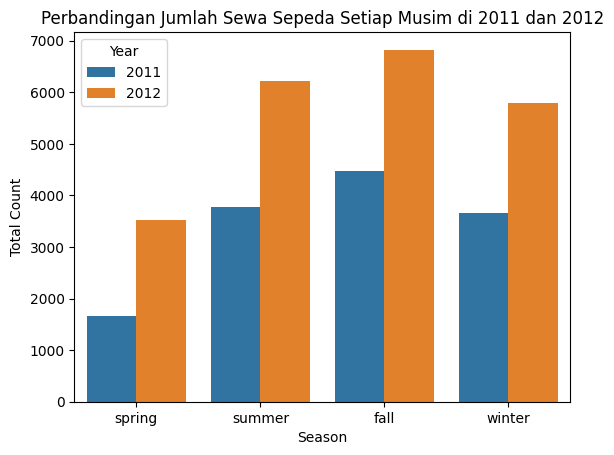

In [70]:
colors = ["#1F77B4", "#FF7F0E"]
plt.title("Perbandingan Jumlah Sewa Sepeda Setiap Musim di 2011 dan 2012")
sns.barplot(
    data=day_df,
    x="season",
    y="cnt",
    hue="yr",
    palette=colors,
    errorbar=None
    )
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.legend(title="Year", labels=["2011", "2012"])
plt.show()

**Insight:**
- Secara keseluruhan, terdapat peningkatan di setiap musim dari 2011 dan 2012
- Di tahun 2011 dan 2012, urutan sewa dari season yang terbanyak adalah Fall, Summer, Winter, dan yang terakhir Spring
- Pertumbuhan jumlah sewa pada tahun 2012 di setiap season stabil jika dilihat dari tahun 2011 (urutan season sewa terbanyak masih sama antara 2011 dan 2012)
- Jumlah sewa per season terbanyak di tahun 2012 ada di Fall dengan jumlah hampir 7000 sewa, sedangkan untuk tahun 2011 hanya diatas sekitar sedikit diatas 4000. Kenaikan ini juga terlihat di season Spring dimana pada tahun 2011 jumlah sewa kurang dari 2000 namun di tahun 2012 meningkat dengan jumlah diantara 3000-4000 sewa

### Pertanyaan 2: Bagaimana pengaruh humidity terhadap jumlah sewa sepeda pengguna casual dan registered?

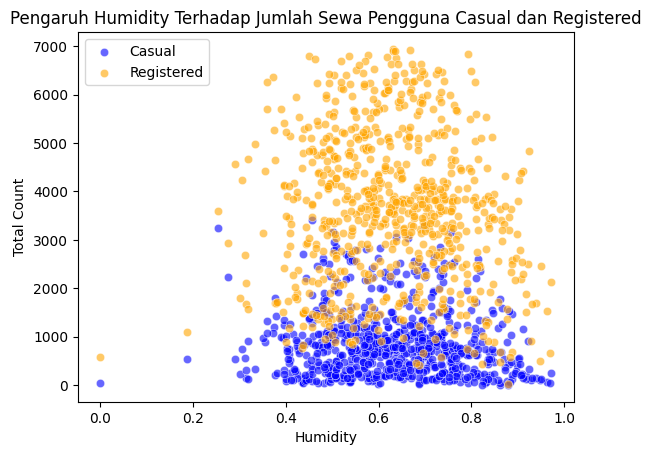

In [71]:
plt.title("Pengaruh Humidity Terhadap Jumlah Sewa Pengguna Casual dan Registered")
sns.scatterplot(
    data=day_df,
    x="hum",
    y="casual",
    color="blue",
    alpha=0.6,
    label="Casual"
    )
sns.scatterplot(
    data=day_df,
    x="hum",
    y="registered",
    color="orange",
    alpha=0.6,
    label="Registered"
    )
plt.xlabel("Humidity")
plt.ylabel("Total Count")
plt.show()

**Insight:**
- Pengguna registered cenderung memiliki jumlah sewa yang lebih banyak dibanding pengguna casual dalam semua humidity. Ini menandakan pengguna registered banyak yang menyewa sepeda dalam segala humidity
- Pengguna casual menurun di humidity tinggi (diatas 0.8) dan humidity yang rendah (dibawah 0.4), yang menandakan pengguna casual cenderung tidak menyewa sepeda jika humidity cuaca sangat rendah dan tinggi. Bahkan untuk humidity 0.0 tidak ada yang menyewa sepeda sama sekali untuk pengguna casual, berbeda dengan pengguna registered yang tetap menyewa.
- Pengguna casual dan registered menunjukkan jumlah sewa yang tinggi di humidity 0.4 sampai 0.8, yang artinya humidity sedang cocok dan disukai oleh pengguna untuk menyewa sepeda

## Analisis Lanjutan (Opsional)

Pada analisis lanjutan, bining akan dilakukan untuk mengelompok hari ke 3 jenis tempat berdasarkan jumlah sewa di hari tersebut. Akan ada 3 kategori, low, medium, dan high. Karena di EDA sebelumnya sudah didapatkan jumlah sewa tertinggi dan terendah, maka pengelompokkannya akan menggunakan 4 bin edges, yaitu 0, 3000, 5000, dan max. Low akan berkisar dari 0-3000, medium 3001-5000, dan high 5001-max.

In [72]:
max_cnt = day_df["cnt"].max()
bins = [0, (1/3) * max_cnt, (2/3) * max_cnt, max_cnt]
labels=["Low", "Medium", "High"]

day_df["bins_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels, include_lowest=True)
print(day_df["bins_category"].value_counts())

bins_category
Medium    372
High      195
Low       164
Name: count, dtype: int64


**Insight:**
- Dari hasil yang didapatkan, terdapat 372 hari dengan jumlah sewa medium, 195 hari high, dan 167 hari low

Kemudian akan divisualisasikan kedalam barplot agar lebih mudah dalam melihat dan mengerti

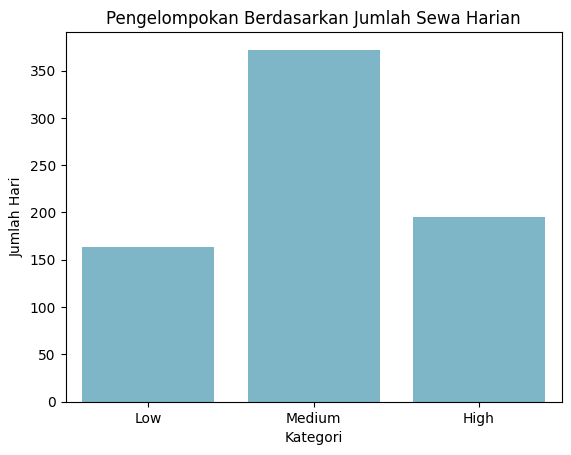

In [73]:
cnt_counts = day_df["bins_category"].value_counts().sort_index()
plt.title("Pengelompokan Berdasarkan Jumlah Sewa Harian")
sns.barplot(
    x=cnt_counts.index,
    y=cnt_counts.values,
    color="#72BCD4"
    )
plt.xlabel("Kategori")
plt.ylabel("Jumlah Hari")
plt.show()

**Insight:**
- Kategori High memiliki jumlah hari dengan jumlah sewa terbanyak, yang diikuti dengan medium, dan yang terakhir low

Untuk mengetahui jumlah hari yang memiliki sewa ketika weekday dan weekend dapat menggunakan manual grouping. Karena 0 = Monday, maka 5 dan 6 adalah weekend

In [74]:
day_df["day_type"] = day_df["weekday"].apply(lambda x: "Weekend" if x in ['Sunday', 'Saturday'] else "Weekday")
print(day_df["day_type"].value_counts())

day_type
Weekday    521
Weekend    210
Name: count, dtype: int64


**Insight:**
- Jumlah hari weekday yang memiliki sewa sepeda adalah 522 hari, sedangkan weekend hanya 209 hari

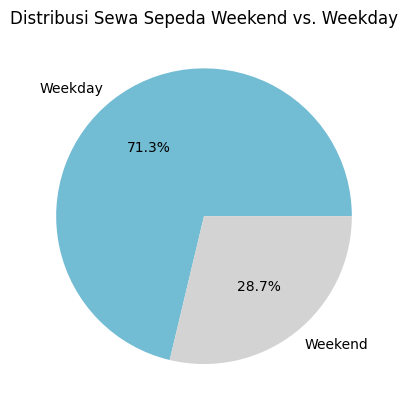

In [75]:
day_type_counts = day_df["day_type"].value_counts()
colors = ["#72BCD4", "#D3D3D3"]
plt.pie(
    day_type_counts,
    labels=day_type_counts.index,
    autopct="%1.1f%%",
    colors=colors)
plt.title("Distribusi Sewa Sepeda Weekend vs. Weekday")
plt.show()

**Insight:**
- Dapat dilihat pada pie chart, weekday mendominasi dengan 71.3% dan weekend hanya 28.7%

## Conclusion

- Conclusion pertanyaan 1
> Secara keseluruhan, terdapat peningkatan di setiap musim dari 2011 dan 2012. Di tahun 2011 dan 2012, urutan sewa dari season yang terbanyak adalah Fall, Summer, Winter, dan yang terakhir Spring, yang artinya pertumbuhan jumlah sewa pada tahun 2012 di setiap season stabil. Jumlah sewa per season terbanyak di tahun 2012 ada di Fall dengan jumlah hampir 7000 sewa, sedangkan untuk tahun 2011 hanya diatas sekitar sedikit diatas 4000. Kenaikan ini juga terlihat di season Spring dimana pada tahun 2011 jumlah sewa kurang dari 2000 namun di tahun 2012 meningkat dengan jumlah diantara 3000-4000 sewa
- Conclusion pertanyaan 2
> Pengguna registered cenderung memiliki jumlah sewa yang lebih banyak dibanding pengguna casual dalam semua humidity. Ini menandakan pengguna registered banyak yang menyewa sepeda dalam segala humidity. Pengguna casual dan registered menunjukkan jumlah sewa yang tinggi di humidity 0.4 sampai 0.8, yang artinya humidity sedang cocok dan disukai oleh pengguna untuk menyewa sepeda. Pengguna casual menurun di humidity tinggi (diatas 0.8) dan humidity yang rendah (dibawah 0.4), yang menandakan pengguna casual cenderung tidak menyewa sepeda jika humidity cuaca sangat rendah dan tinggi. Bahkan untuk humidity 0.0 tidak ada yang menyewa sepeda sama sekali untuk pengguna casual, berbeda dengan pengguna registered yang tetap menyewa.


In [76]:
day_df.to_csv("all_data.csv", index=False)